# Exercise 1: Linear Regression from Scratch

**Goal:**
Predict house prices based on square footage using only NumPy (no scikit-learn).


### 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. Create Sample Dataset

In [2]:
# Input (square footage)
X = np.array([600, 800, 1000, 1200, 1400])

# Output (house price in $1000s)
y = np.array([150, 200, 250, 300, 350])

### 3. Normalize the Data (Optional but good practice)

In [4]:
X_mean = X.mean()
X_std = X.std()
X_norm = (X - X_mean) / X_std

### 4. Add Bias Term (intercept)

In [11]:
"""
    np.c_ - is a convenient shortcut in NumPy for column-wise concatenation of arrays. It is especially useful when combining 1D arrays or reshaping scalars/lists into columns.

    a = np.array([1, 2, 3])
    b = np.array([4, 5, 6])

    result = np.c_[a, b]

    result will be: [[1 4]
                     [2 5]
                     [3 6]]
"""

X_b = np.c_[np.ones((X_norm.shape[0], 1)), X_norm]  # Add column of ones

print("X with bias term:\n", X_b)

X with bias term:
 [[ 1.         -1.41421356]
 [ 1.         -0.70710678]
 [ 1.          0.        ]
 [ 1.          0.70710678]
 [ 1.          1.41421356]]


### 5. Initialize Parameters

In [6]:
theta = np.zeros(2)  # [bias, weight]
learning_rate = 0.1
epochs = 1000
m = len(X_b)

### 6. Gradient Descent Loop

In [7]:
for i in range(epochs):
    # Compute predictions
    y_pred = X_b.dot(theta)  # y = bias*1 + weight*x
    y_diff = y_pred - y  # Difference between predicted and actual
    gradients = (2/m) * X_b.T.dot(y_diff)  # Gradient calculation
    theta -= learning_rate * gradients

### 7. Print Results

In [12]:
print("Estimated parameters (theta):", theta)
print("Estimated intercept (bias):", theta[0])
print("Estimated weight (slope):", theta[1])

Estimated parameters (theta): [250.          70.71067812]
Estimated intercept (bias): 249.99999999999994
Estimated weight (slope): 70.71067811865474


### 8. Predict and Visualize

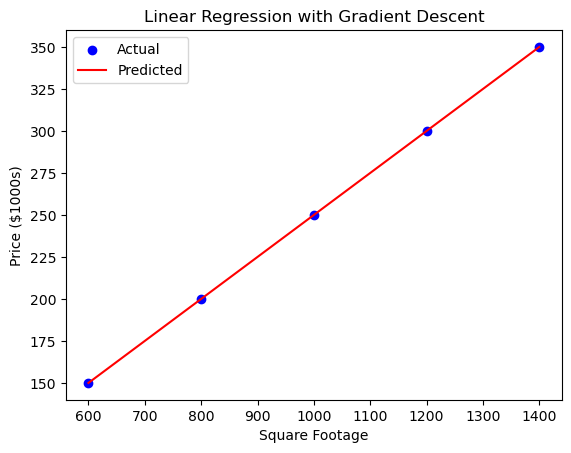

In [16]:
y_pred = X_b.dot(theta) # y = bias*1 + weight*x

plt.scatter(X, y, label="Actual", color="blue")
plt.plot(X, y_pred, label="Predicted", color="red")
plt.xlabel("Square Footage")
plt.ylabel("Price ($1000s)")
plt.title("Linear Regression with Gradient Descent")
plt.legend()
plt.show()

### 9. Evaluate

In [19]:
# Calculate Mean Squared Error
mse = np.mean((y - y_pred) ** 2)  # sqrt((yi - y_pred_i)^2)

print("Mean Squared Error:", mse)

Mean Squared Error: 4.685202688288633e-27
